<h1>Autorzy Projektu</h1>

 - Karol Sekściński
 - Wiktor Zaremba

Celem projektu jest opracowanie modelu regresji pokazującego trend w wybranym przez nas zbiorze danych, wraz z jego analizą eksploracyjną.

Wybraliśmy zbiór danych - Human Resources Data Set (https://www.kaggle.com/datasets/rhuebner/human-resources-data-set) jest to stworzony przez Panią Dr. Carla Patalano i Pana Dr. Rich Huebnera z New England College of Business, do nauki Tableau.

Zbiór zawiera imiona i nazwiska, date urodzenia, wiek, płeć, stan cywilny, datę zatrudnienia, powody rozwiązania umowy, dział, czy firma jest aktywna czy rozwiązana, stanowisko, stawkę wynagrodzenia, nazwisko menedżera, wynik wydajności, nieobecności, datę najnowszej oceny wyników i wynik zaangażowania pracowników.

Przykładowe pytania do inspiracji postawienia hipotezy do posiadanych danych podane przez osoby publikujące zbiór danych:
1. Czy istnieje związek między tym, dla kogo dana osoba pracuje, a jej wynikami?
2. Jaki jest ogólny profil różnorodności organizacji?
3. Jakie są nasze najlepsze źrodła rekrutacji, jesli chcemy zapewnić zróżnicowaną organizację?
4. Czy mozemy przewidzieć, kto odejdzie, a kto nie? Jaki poziom dokładności możemy w tym przypadku osiągnąć?
5. Czy są obszary firmy, w ktorych wynagrodznie nie jest sprawiedliwe?


In [302]:
# Wczytanie podstawowych bibliotek
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [303]:
# Wczytanie danych
dtype_dict = {'Employee_Name': str, 'EmpID': int, 'MarriedID': int, 'MaritalStatusID': int, 'GenderID': int, 'EmpStatusID': int, 'DeptID': int, 'PerfScoreID': int, 'FromDiversityJobFairID': int, 'Salary': int, 'Termd': int, 'PositionID': int, 'Position': str, 'State': str, 'Zip': int, 'DOB': str, 'Sex': str, 'MaritalDesc': str, 'CitizenDesc': str, 'HispanicLatino': str, 'RaceDesc': str, 'DateofHire': str, 'DateofTermination': str, 'TermReason': str, 'EmploymentStatus': str, 'Department': str, 'ManagerName': str, 'ManagerID': float, 'RecruitmentSource': str, 'PerformanceScore': str, 'EngagementSurvey': float, 'EmpSatisfaction': int, 'SpecialProjectsCount': int, 'LastPerformanceReview_Date': str, 'DaysLateLast30': int, 'Absences': int}
data = pd.read_csv('HRDataset_v14.csv', sep=',', dtype=dtype_dict)
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [304]:
# Zamiana dat na obiekty daty
data['DOB'] = data['DOB'].apply(lambda x: x.split('/'))
data['DOB'] = data['DOB'].apply(lambda x: x[0] + '/' + x[1] + '/19' + x[2])
data['DOB'] = pd.to_datetime(data['DOB'], format='%m/%d/%Y')

data['DateofHire'] = pd.to_datetime(data['DateofHire'], format='%m/%d/%Y')
data['DateofTermination'] = pd.to_datetime(data['DateofTermination'], format='%m/%d/%Y')
data['LastPerformanceReview_Date'] = pd.to_datetime(data['LastPerformanceReview_Date'], format='%m/%d/%Y')


In [305]:
# Dane takie jak EmpID, Zip nie są potrzebne do analizy
data = data.drop(['EmpID', 'Zip', 'ManagerID'], axis=1)

In [306]:
data.columns

Index(['Employee_Name', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'DOB', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   MarriedID                   311 non-null    int32         
 2   MaritalStatusID             311 non-null    int32         
 3   GenderID                    311 non-null    int32         
 4   EmpStatusID                 311 non-null    int32         
 5   DeptID                      311 non-null    int32         
 6   PerfScoreID                 311 non-null    int32         
 7   FromDiversityJobFairID      311 non-null    int32         
 8   Salary                      311 non-null    int32         
 9   Termd                       311 non-null    int32         
 10  PositionID                  311 non-null    int32         
 11  Position                    311 non-null    object        

In [308]:
data.describe()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,DOB,DateofHire,DateofTermination,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311,311,104,311.000000,311.000000,311.000000,311,311.000000,311.000000
mean,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,1979-02-06 09:48:02.315112544,2013-02-03 22:50:32.797427712,2015-06-14 11:46:09.230769152,4.110000,3.890675,1.218650,2017-09-10 21:17:56.527331072,0.414791,10.237942
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1951-01-02 00:00:00,2006-01-09 00:00:00,2010-08-30 00:00:00,1.120000,1.000000,0.000000,2010-07-14 00:00:00,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1973-12-03 00:00:00,2011-07-11 00:00:00,2014-01-10 12:00:00,3.690000,3.000000,0.000000,2016-03-19 12:00:00,0.000000,5.000000
50%,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,1980-09-30 00:00:00,2013-02-18 00:00:00,2015-09-22 00:00:00,4.280000,4.000000,0.000000,2019-01-16 00:00:00,0.000000,10.000000
75%,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,1986-05-29 12:00:00,2014-09-23 12:00:00,2016-09-08 06:00:00,4.700000,5.000000,0.000000,2019-02-04 00:00:00,0.000000,15.000000
max,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,1992-08-17 00:00:00,2018-07-09 00:00:00,2018-11-10 00:00:00,5.000000,5.000000,8.000000,2019-02-28 00:00:00,6.000000,20.000000
std,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,NaN,NaN,NaN,0.789938,0.909241,2.349421,NaN,1.294519,5.852596


<h1>Analiza ekspolarycyjna</h1>

In [309]:
# Wybranie danych numerycznych
num = []
for i, col in enumerate(data.columns, 1):
    if "int" in str(data[col].dtype) or "float" in str(data[col].dtype):
        num.append(col)
print(num)


['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']


In [310]:
# Wybranie danych kategorycznych
other = []
for i, col in enumerate(data.columns, 1):
    if "int" not in str(data[col].dtype) and "float" not in str(data[col].dtype):
        other.append(col)
print(other)

['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource', 'PerformanceScore', 'LastPerformanceReview_Date']


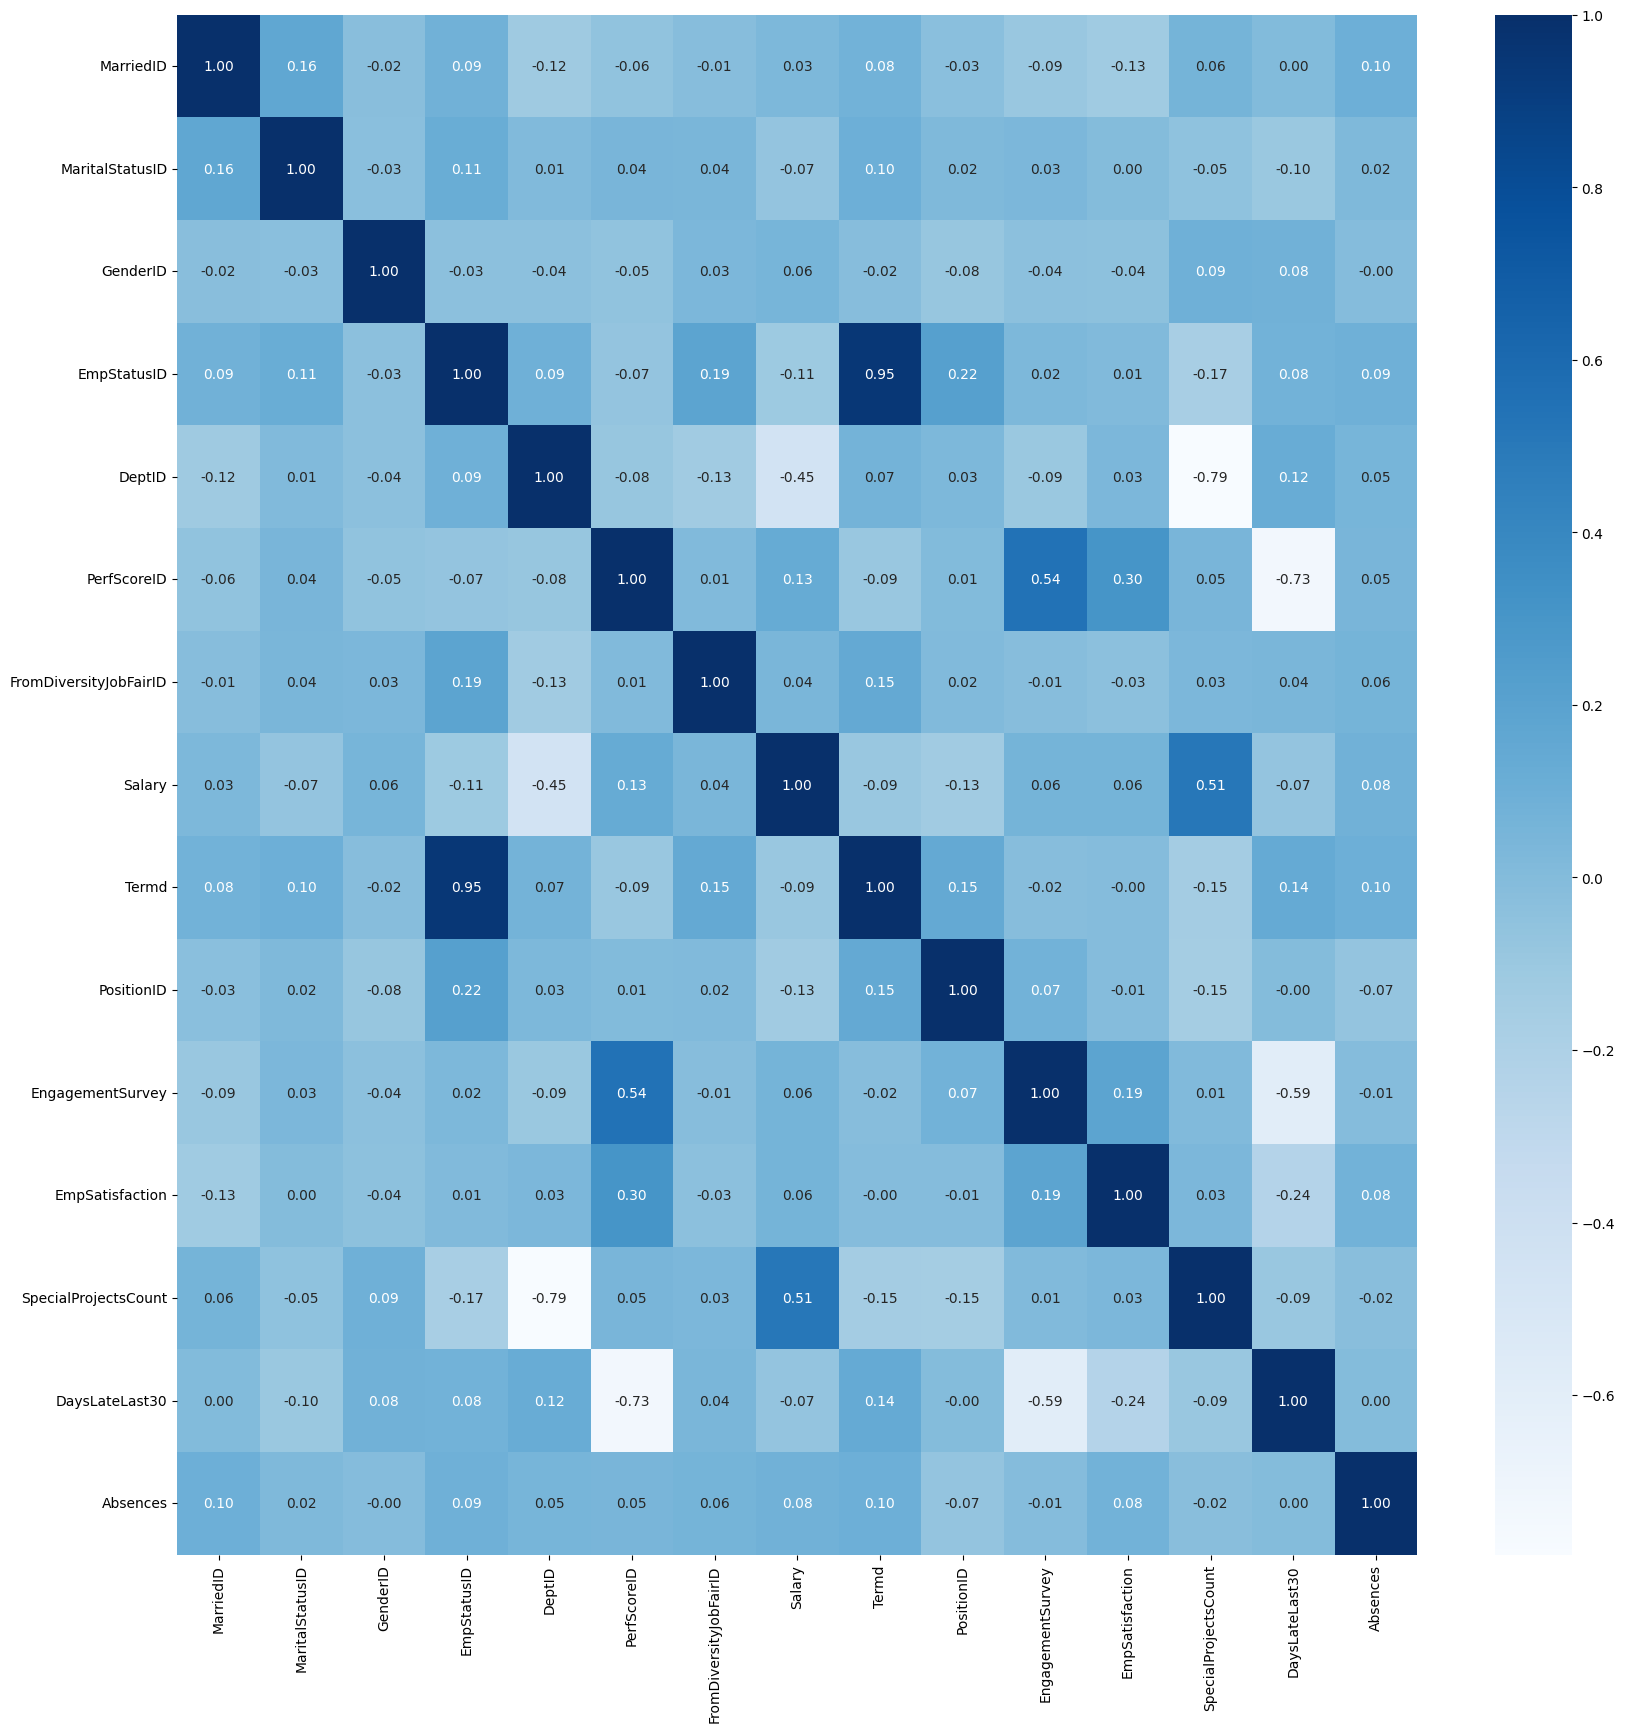

In [311]:
# Sprawdzenie zaleznosci miedzy danymi numerycznymi
plt.figure(figsize=(20, 20))
sns.heatmap(data[num].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

Interpretacja powyższej macierzy korelacji.
Przypomnienie: Korelacja może przyjąć wartości od -1 do +1. Odchylenie skrajnie ujemne oznacza, że im wyższa jest wartość jednej zmiennej, tym niższa dla drugiej, z kolei skrajnie dodatni wynik oznacza, że obie wartości będą rosły lub malały synchronicznie. 0 wskazuje na całkowity brak liniowego związku pomiędzy zmiennymi.

Większość cech ma korelacje między sobą w okolicach zera, czyli nie występuje pomiędzy nimi ani korelacja liniowa dodatnia ani ujemna. Jednakże jest kilka wyjatków.

Silna korelacja dodatnia: 
1. Termd ([0 1])  i EmpStatusID ([1 2 ... 5])


Umiarkowana korelacja dodatnia: 
1. EmpSatisfaction ([1 2 ... 5])  i PerfScoreID ([1 2 3 4])
2. SpecialProjectsCount ([0 1 ... 8]) i Salary ([54046 ... 250000])

Silna korelacja ujemna: 
1. SpecialProjectsCount ([0 1 ... 8]) i DeptID ([1 2 ... 6]) 
2. DaysLaterLast30 ([0 1 ... 6]) i PerfScoreID ([1 2 3 4])

Umiarkowana korelacja ujemna:
1. Salary ([54046 ... 250000]) i DeptID ([1 2 ... 6]) 
2. DaysLaterLast30 ([0 1 ... 6]) i EngagementSurvey ([1.12 ... 5]) 


Większość zmiennych numerycznych wykazuje niskie lub umiarkowane poziomy korelacji. Nie ma silnych zależności między większością tych zmiennych. Może to wskazywać na to, że każda cecha wnosi unikalne informacje do zbioru danych. Jest to korzystne dla modelowania statystycznego i predykcyjnego, ponieważ niezależne dane mogą lepiej przyczynić się do modelu.

Występująca silna korelacja dodatnia dla zmiennej 'Termd' oraz 'EmpStatusID' sugeruje, że istnieje bezpośredni związek między tymi dwoma zmiennymi. W systemach HR często status zatrudnienia pracownika jest powiązany z wewnetrznym statusem pracownika np. zakończenie pracy. Stąd, gdy pracownik zostaje zwolniony, aktualizowany jest jego status zatrudnienia jak i identyfikator zakończenia pracy.

Występująca silna korelacja ujemna dla zmiennej 'SpecialProjectCounts' oraz 'DeptID' może wynikać z tego względu, iż charakteryzuje specyfikę różnych działów w strukturze organizacji. Niektórzy pracownicy mogą być mniej zaagnażowani w projekty specjalne i wykonywać bardziej rutynową pracę.
Natomiast zmienna 'DaysLaterLast30' oraz 'PerfScoreID' sugeruje, że pracownicy, którzy spóźniają się częściej mają tendencję do niższych wyników oceny wydajności. Taka informacja jest szczególnie istotna dla działów HR, które na podstawie tych danych mogą wprowadzić zmiany dot. efektywności pracy. 

nazwa kolumny, minimalne i maksymalne wartości danych numerycznych
MarriedID 0 1
MaritalStatusID 0 4
GenderID 0 1
EmpStatusID 1 5
DeptID 1 6
PerfScoreID 1 4
FromDiversityJobFairID 0 1
Salary 45046 250000
Termd 0 1
PositionID 1 30
EngagementSurvey 1.12 5.0
EmpSatisfaction 1 5
SpecialProjectsCount 0 8
DaysLateLast30 0 6
Absences 1 20


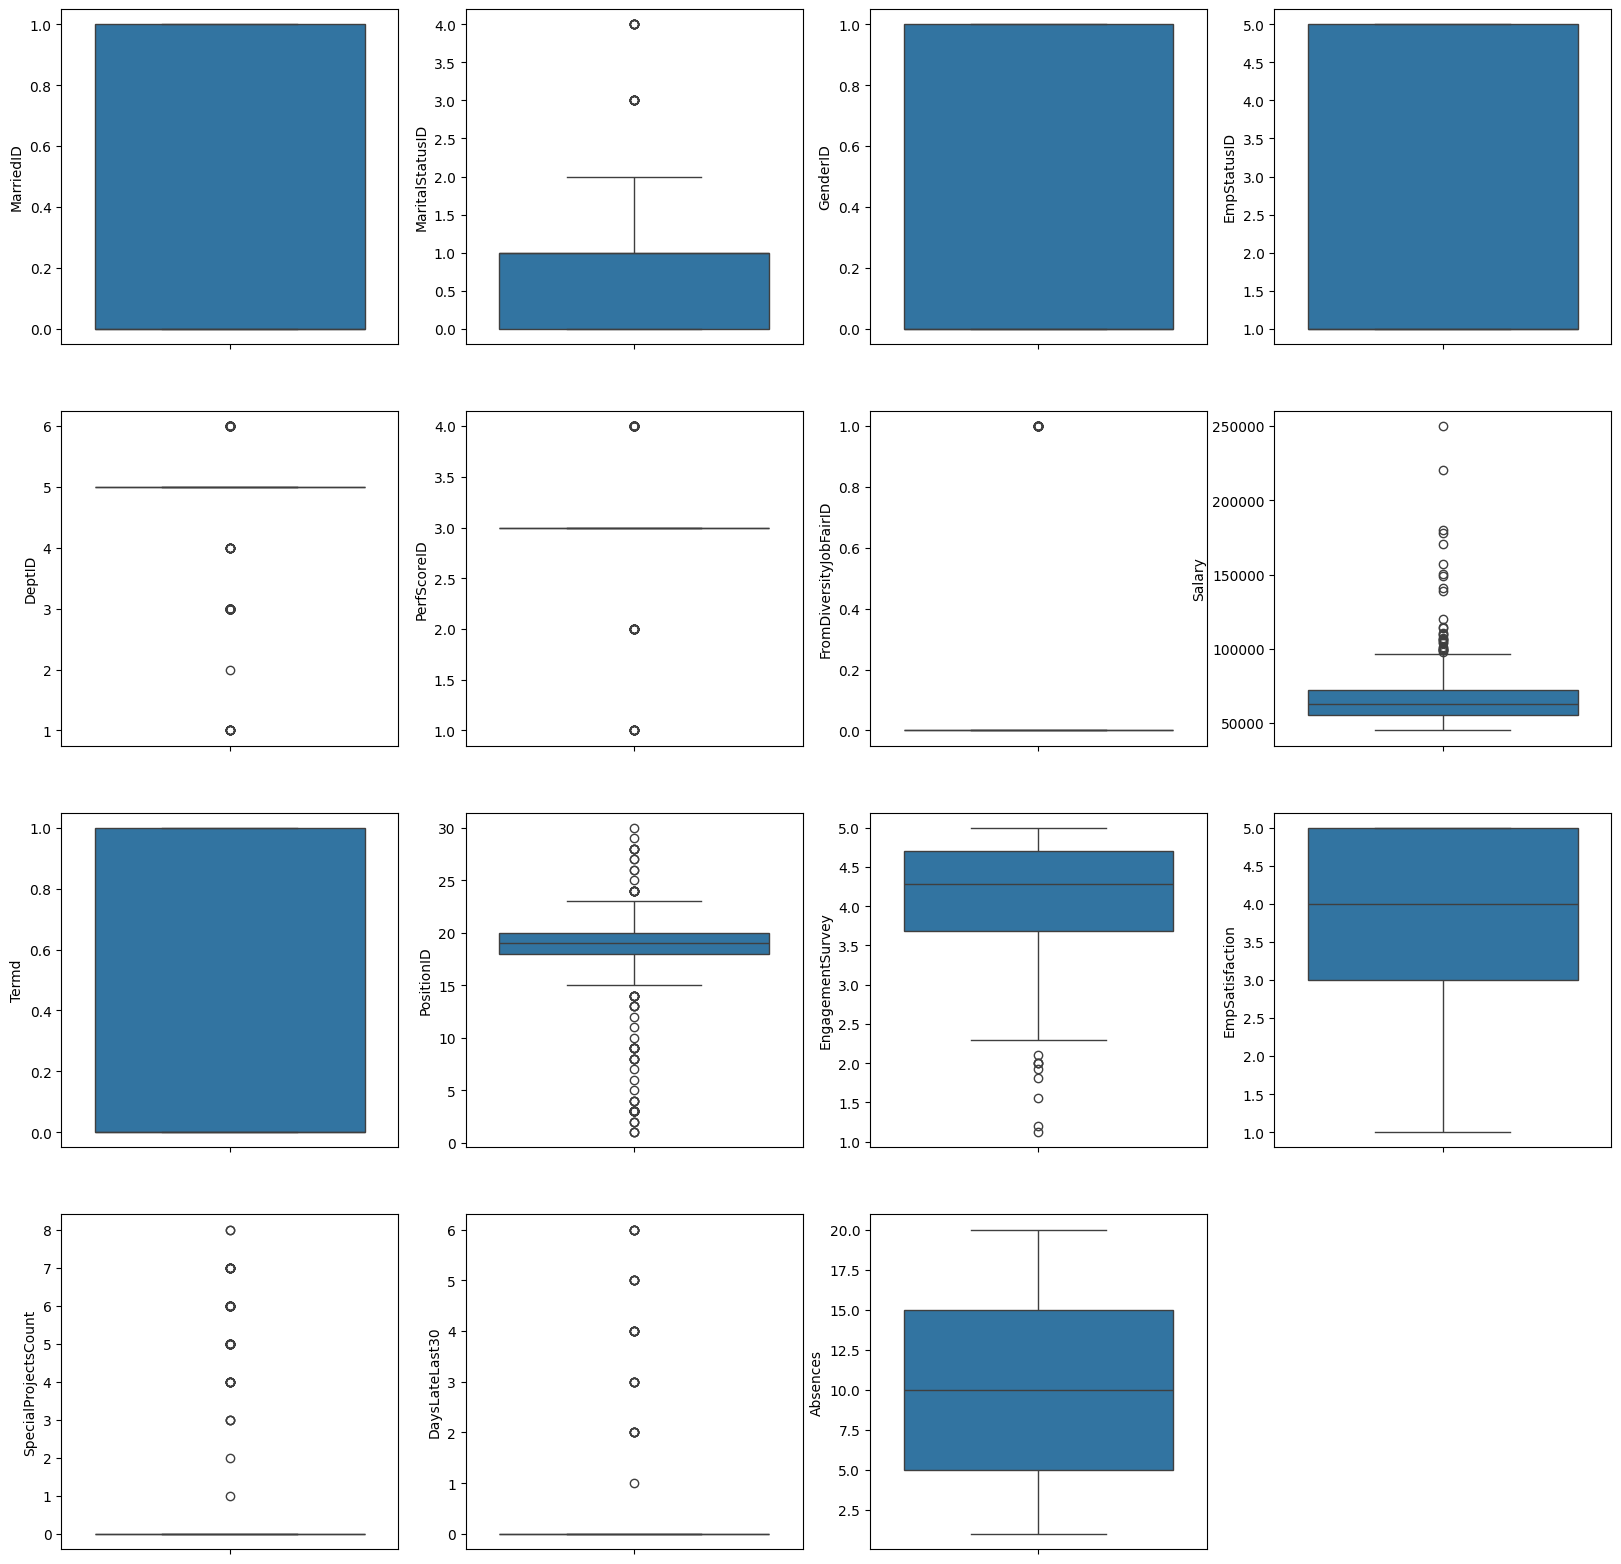

In [312]:
# Zakresy zmiennosci danych numerycznych
plt.figure(figsize=(20, 20))
for i, col in enumerate(num, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=data[col])

print("nazwa kolumny, minimalne i maksymalne wartości danych numerycznych")
for col in num:
    print(col, min(data[col]), max(data[col]))

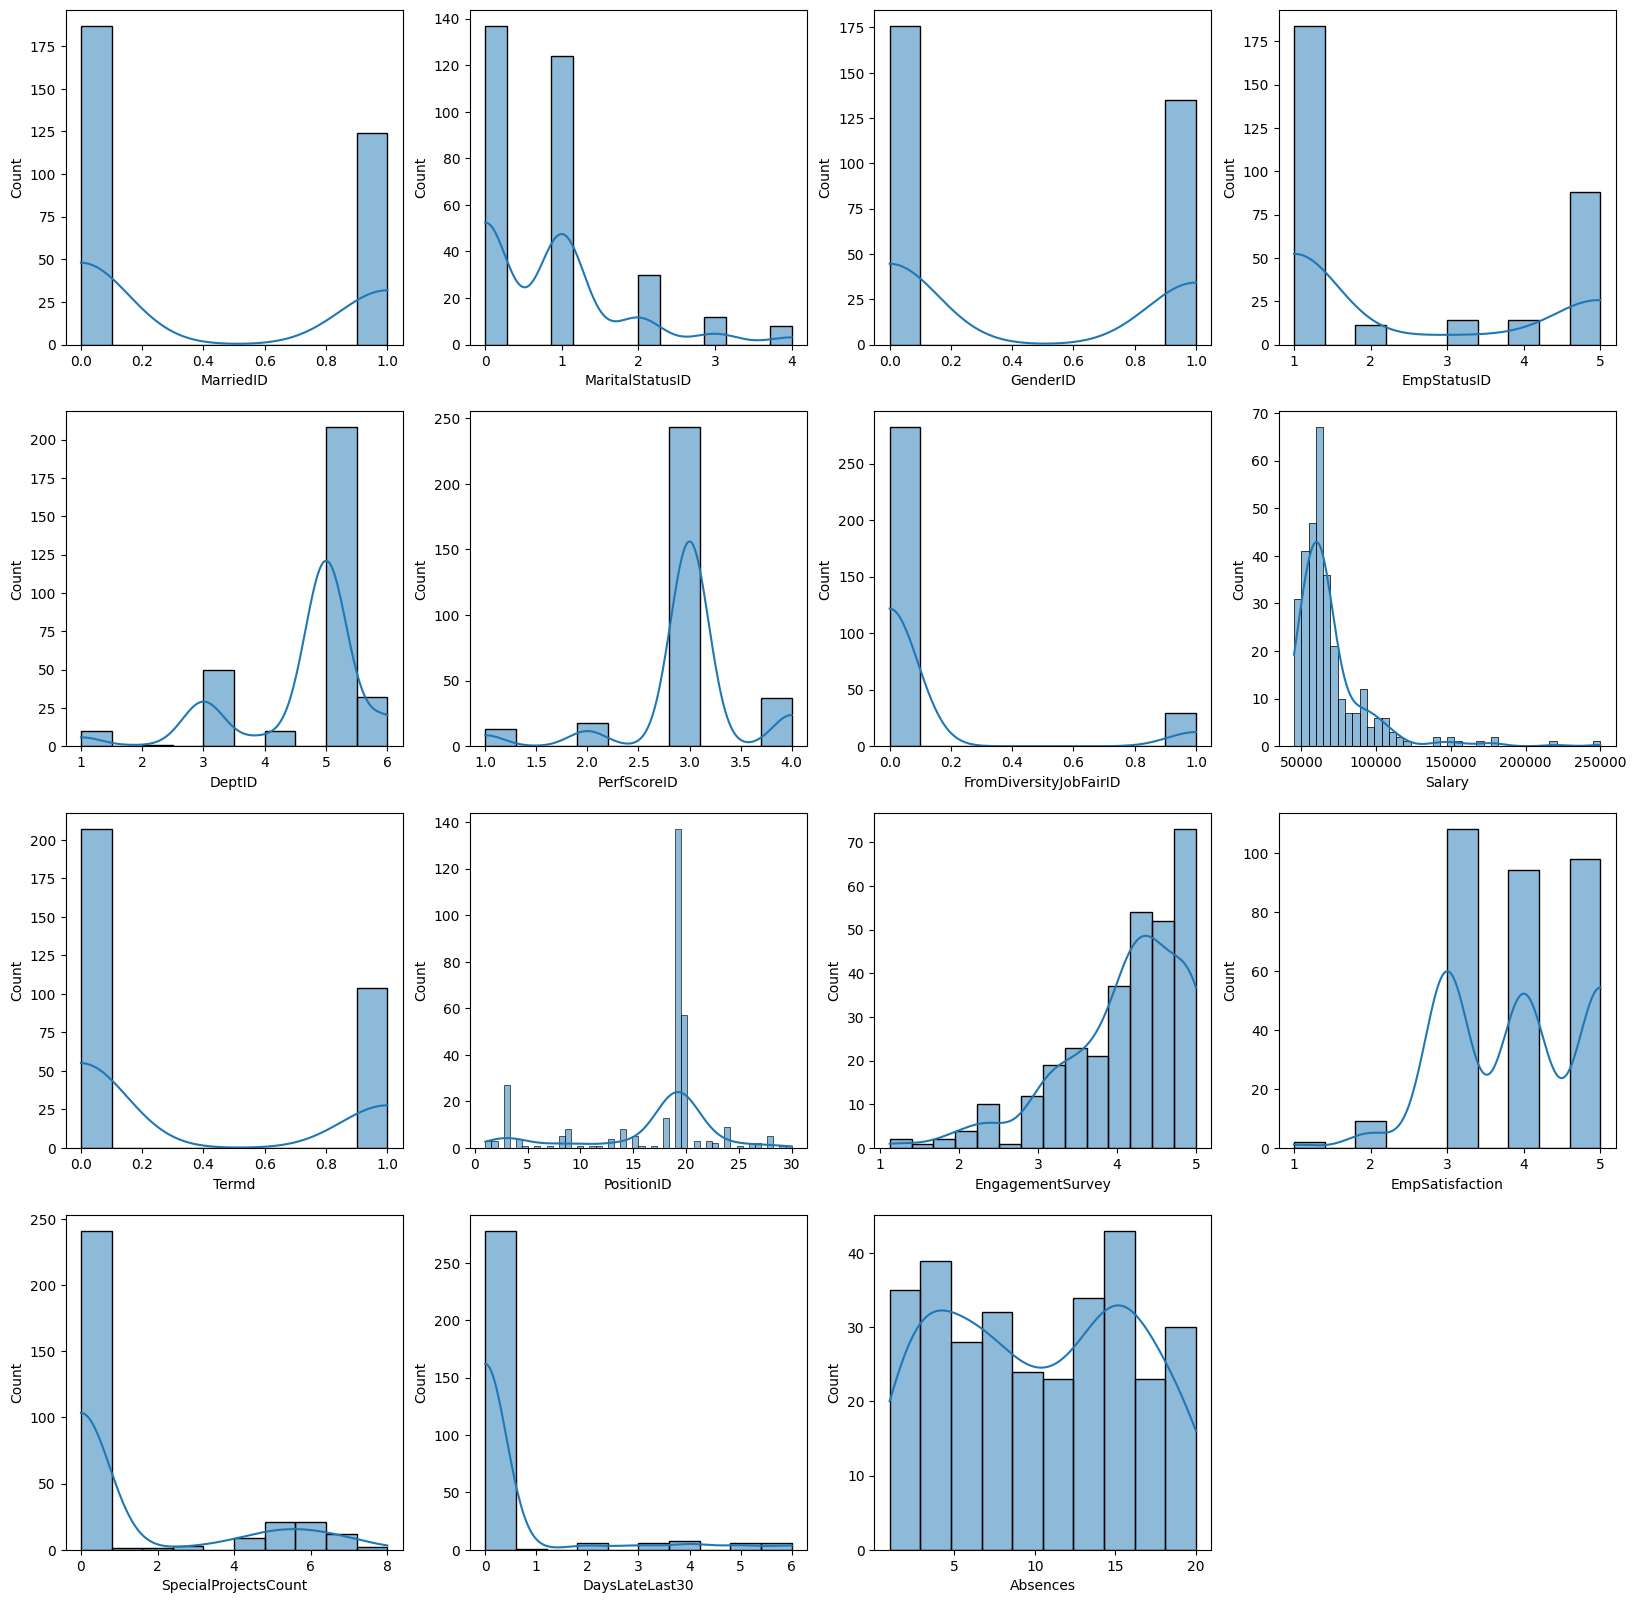

In [313]:
# Histogramy danych numerycznych z kde (kernel density estimation)
plt.figure(figsize=(20, 20))
for i, col in enumerate(num, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[col], kde=True)

Interpretacja wynikow:

1. Histogramy z rozkładem zmiennych dyskretnych, takie jak identyfikatory ('EmpID', 'MarriedID', 'MartialStatusID', 'GenderID', 'EmpStatusID' itd.) Rozkłady te są równomiernie rozłozone, co wskazuje na zróżnicowanie w danych kategoriach. Jest to typowe dla danych kategorycznych zakodowanych liczbowo. 
2. Histogram wynagrodzeń z identyfikatorem 'Salary' jest przykładem rozkładu ciągłego, ze skupiskami w okolicach 65000. Odzwierciedla to rozkład rocznej pensji wśród pracowników, który jest standardowy w strukturach firm.
3. Inne rozkłady zmiennych numerycznych takie jak 'EngagementSurvey', 'EmpSatisfaction', 'DaysLateLast30' wykazują różnorodne rozkłady.
4. Potencjalne wartości odstające występują w rozkładzie zmiennej 'Salary', jeśli jednak uwzględnimi strukturę firmy możemy zakładać, że są to wartości poprawne, oznaczające pensje dyrektorów, kierowników, prezesów itd.
5. Skośność - w rozkładzie identyfikatora 'Salary', 'ManagerID' występuje prawoskośność, natomiast w 'EngagementSurvey' możemy zaobserwowac lewoskośność




Podsumowanie posiadanych zmiennych w zbiorze danych
1. Employee_Name - Nazwisko i Imie Pracownika
2. EmplID - Identyfikator Pracownika
3. MarriedID - Zmienna binarna czy pracownik jest w zwiazku malzenskim (1 oznacza ze jest)
4. MaritalStatusID - Status małżeński
5. GenderID - Zmienna binarna okreslajaca plec Pracownika (1 oznacza mezczyzne)
6. EmpStatusID - Status zatrudnienia pracownika
7. DeptID - Identyfikator działu pracownika
8. PerfScoreID - Identyfikator oceny wydajności
9. FromDiversityJobFairID - Identyfikator pochodzenia zrekrutowanego pracownika
10. Salary - Pensja
11. Termd - Zmienna opisująca status pracownika
12. PositionID - Identyfikator pozycji pracownika
13. Position - Pozycja pracownika
14. State - Stan pracownika (zamieszkania)
15. Zip - Kod pocztowy
16. DOB - Data urodzenia pracownika
17. Sex - Płeć
18. MaritalDesc - Opisowy status małżeński
19. CitizenDesc - Status obywatelstwa
20. HispanicLatino - Identyfikacja latynoska/hiszpańska
21. RaceDesc - Pochodzenie pracownika
22. DateofHire - Data zatrudnienia
23. DateofTermination - Data zakończenia pracy
24. TermReason - Powód zakończenia pracy
25. EmploymentStatus - Status zatrudnienia
26. Department - Nazwa działu
27. ManagerName - Nazwisko mendżera
28. ManagerID - Identyfikator menadżera
29. RecruitmentSource - Źródło rekrutacji
30. PerformanceScore - Ocena wydajności ['Exceeds' 'Fully Meets' 'Needs Improvement' 'PIP']
31. EngagementSurvey - Wynik ankiety zaangażowania
32. EmpSatisfaction - Poziom zadowolenia
33. SpecialProjectsCount - Liczba projektów specjalnych
34. LastPerformanceReview_Date - Data ostatniej oceny aktywności
35. DaysLateLast30 - Liczba spóźnień w ciągu 30 dni
36. Absences - Liczba dni nieobecności



<h1>Analiza stopnia wypełnienia danych</h1>

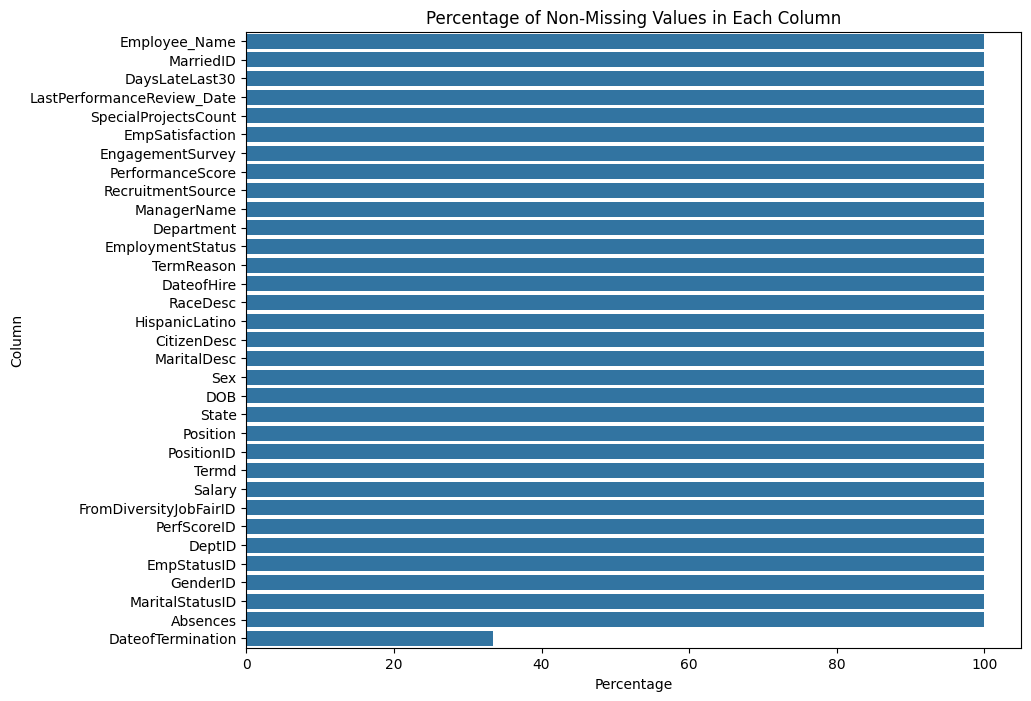

,Column,Non-Missing Values,Percentage
Employee_Name,Employee_Name,311,100.0
MarriedID,MarriedID,311,100.0
DaysLateLast30,DaysLateLast30,311,100.0
LastPerformanceReview_Date,LastPerformanceReview_Date,311,100.0
SpecialProjectsCount,SpecialProjectsCount,311,100.0
EmpSatisfaction,EmpSatisfaction,311,100.0
EngagementSurvey,EngagementSurvey,311,100.0
PerformanceScore,PerformanceScore,311,100.0
RecruitmentSource,RecruitmentSource,311,100.0
ManagerName,ManagerName,311,100.0


In [314]:
non_null_counts = data.count()
non_missing_percentage = (non_null_counts / len(data)) * 100

non_missing_df = pd.DataFrame({'Column': non_null_counts.index, 'Non-Missing Values': non_null_counts, 'Percentage': non_missing_percentage})
non_missing_df_sorted = non_missing_df.sort_values(by='Percentage', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Percentage', y='Column', data=non_missing_df_sorted)
plt.title('Percentage of Non-Missing Values in Each Column')
plt.xlabel('Percentage')
plt.ylabel('Column')
plt.show()

non_missing_df_sorted.head(15)


Z powyższej analizy wypełnienia zbioru wynika, że najwięcej brakujących wartości zawiera kolumna "DateofTermination" - 207 , co stanowi prawie 67% całego zbioru danych tej cechy. Jest to spodziewany wynik, ponieważ cecha ta odnosi się do daty zakończenia pracy, a większość pracowników jest nadal zatrudniona.

Kolejna kolumna z brakującymi danymi jest "ManagedID" - 8 brakujących wartości. Oznacza to ,że mamy 8 pracowników (prawdoporobnie menedżerów), którzy nie podlegają pod żadnego innego menedżera.

Poza powyższymi kolumnami, reszta danych jest w 100% kompletna.

In [315]:
# Obliczenie stazu pracy pracownikow
data['LengthofEmployment'] = data['DateofTermination'] - data['DateofHire']
data['LengthofEmployment'] = data['LengthofEmployment'].apply(lambda x: x.days)
data['LengthofEmployment'] = data['LengthofEmployment'].fillna((pd.Timestamp.now() - data['DateofHire']).apply(lambda x: x.days))
data['LengthofEmployment'] = data['LengthofEmployment'].astype(int) / 365



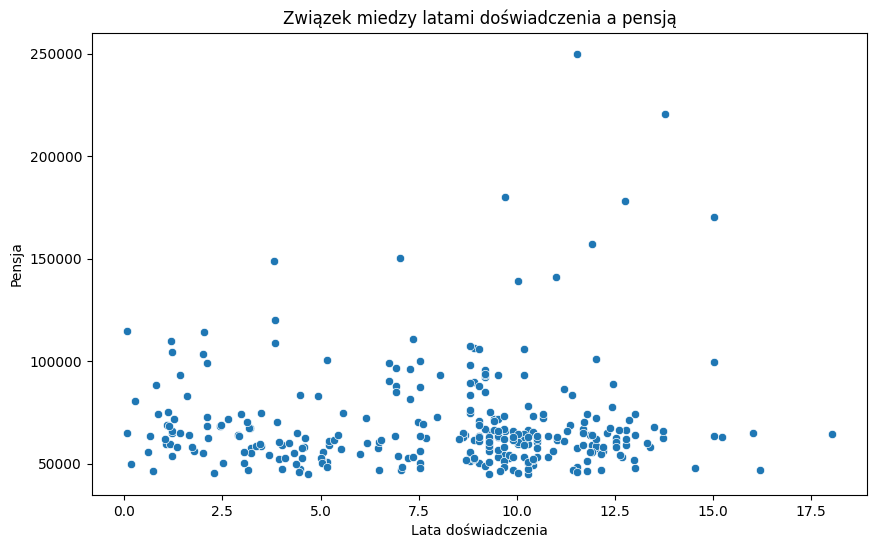

In [316]:
# Wykres zaleznosci doswiadczenia od pensji
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LengthofEmployment', y='Salary', data=data)
plt.title('Związek miedzy latami doświadczenia a pensją')
plt.xlabel('Lata doświadczenia')
plt.ylabel('Pensja')
plt.show()

Wykres pokazuje, jak wynagrodzenia rozkładają się w odniesieniu do lat doświadczenia pracowników. Można zaobserwować pewną słabą tendencję do wzrostu wynagrodzenia wraz ze wzrostem doświadczenia, co jest typowym trendem w wielu organizacjach. Istnieje znaczne zróżnicowanie wynagrodzeń wśród pracowników z podobnym stażem pracy, co sugeruje, że inne czynniki (takie jak rola, dział, umiejętności) również wpływają na wynagrodzenie.

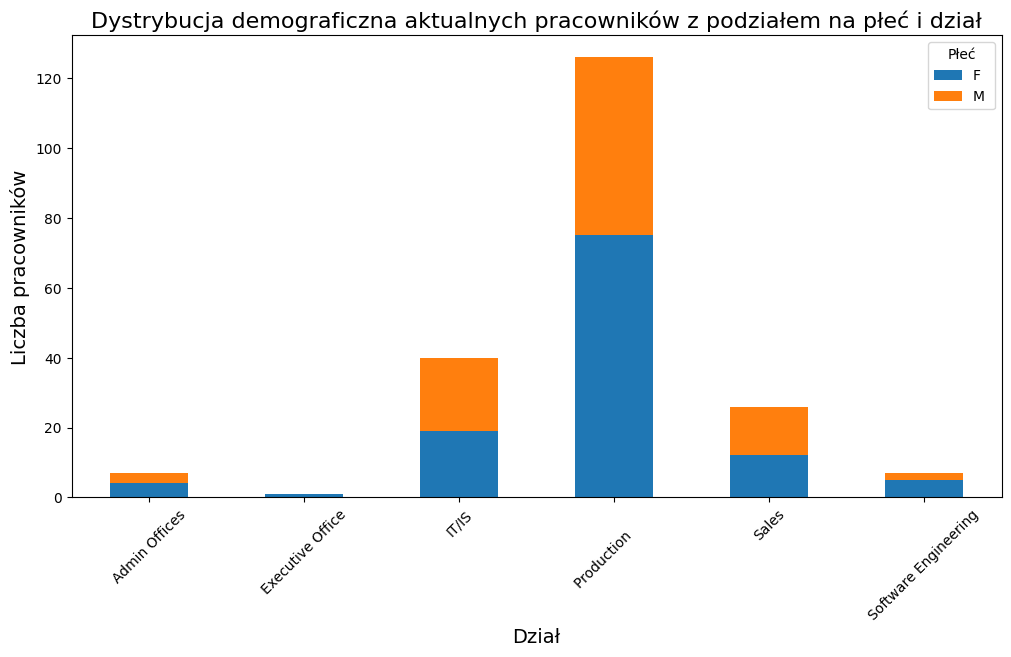

In [317]:
# Filtracja danych, aby uwzględnić tylko pracowników, dla których DateofTermination jest pusta 
current_employees = data[data['DateofTermination'].isna()]

# Grupowanie danych według działu i płci
department_sex_counts = current_employees.groupby(['Department', 'Sex']).size().unstack()

# Tworzenie wykresu słupkowego skumulowanego
department_sex_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Dystrybucja demograficzna aktualnych pracowników z podziałem na płeć i dział', fontsize=16)
plt.xlabel('Dział', fontsize=14)
plt.ylabel('Liczba pracowników', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Płeć')
plt.show()

Wykres pokazuje rozkład liczby pracowników mężczyzn i kobiet w różnych działach organizacji. Można zaobserwować, że w niektórych działach np. Produkcja lub Dział Realizacji istnieje zróżnicowanie pod względem równowagi płci. taki rozkład może wskazywać na specyfikę pracy lub utarte, "tradycyjne" role płciowe w danych obszarach.

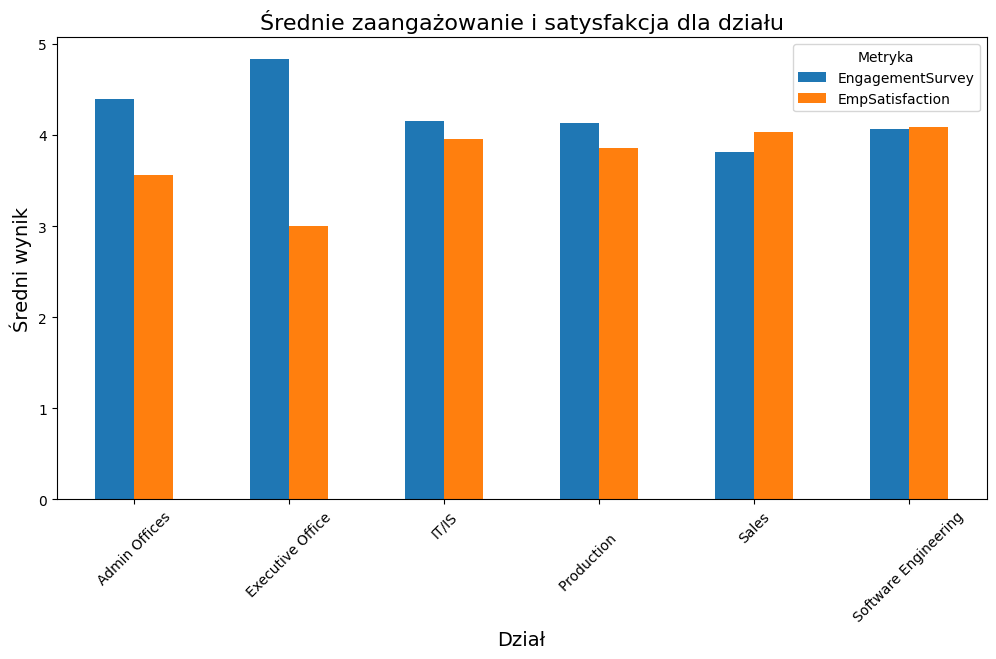

In [318]:
department_engagement = data.groupby('Department')['EngagementSurvey'].mean()
department_satisfaction = data.groupby('Department')['EmpSatisfaction'].mean()

# Przygotowanie danych do wykresu
department_analysis = pd.DataFrame({'EngagementSurvey': department_engagement, 
                                    'EmpSatisfaction': department_satisfaction})
# Tworzenie wykresu słupkowego
department_analysis.plot(kind='bar', figsize=(12, 6))
plt.title('Średnie zaangażowanie i satysfakcja dla działu', fontsize=16)
plt.xlabel('Dział', fontsize=14)
plt.ylabel('Średni wynik', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metryka')
plt.show()

W zdecydowanej większości działów zaangażowanie i satysfakcja są na zbliżonym poziomie, podczas gdy w działach administracji i realizacji są one dość mocno od siebie różne. Wykres ten może pomóc w identyfikacji działów, które mogą skorzystać z programów rozwojowych, szkoleń czy inicjatyw budujących zaangażowanie, są to informacje istotne dla takich działów jak HR.

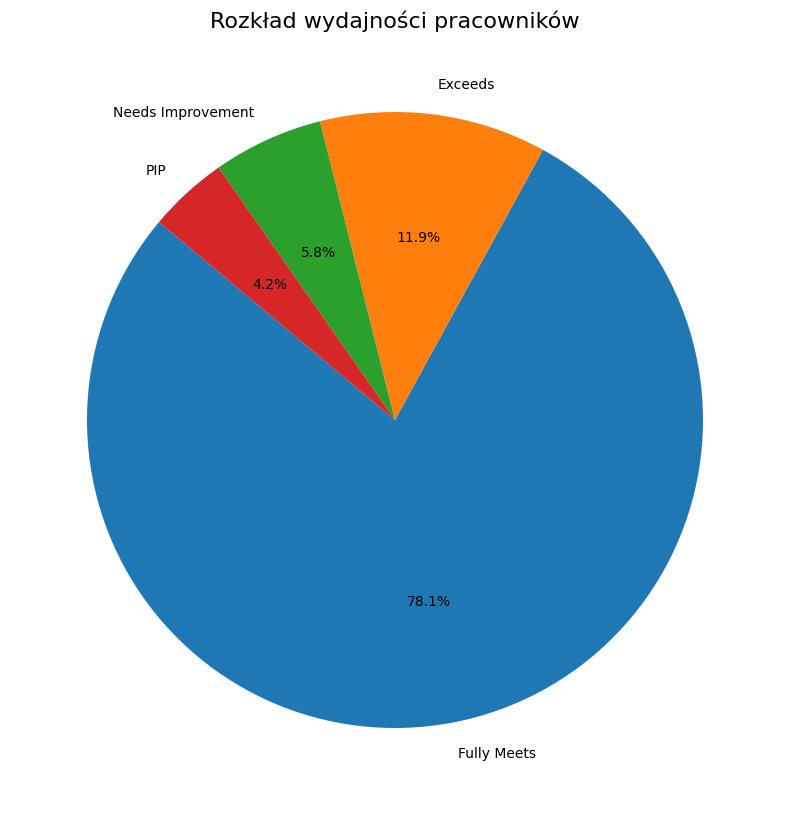

In [319]:
performance_counts = data['PerformanceScore'].value_counts()

# Tworzenie wykresu kołowego
plt.figure(figsize=(10, 10))
performance_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Rozkład wydajności pracowników', fontsize=16)
plt.ylabel('')  
plt.show()

Analizując rozkład ocen, odrazu możemy zauważyć, że większość pracowników wykazuje ogólną dobrą wydajność w organizacji. Niski odsetek rzędu 10% pracowników wykazuje niesatysfkacjonujący wynik wydajności, może to sygnalizować na potrzebę rozwoju pracowników lub lepszego zarządzania wydajnością

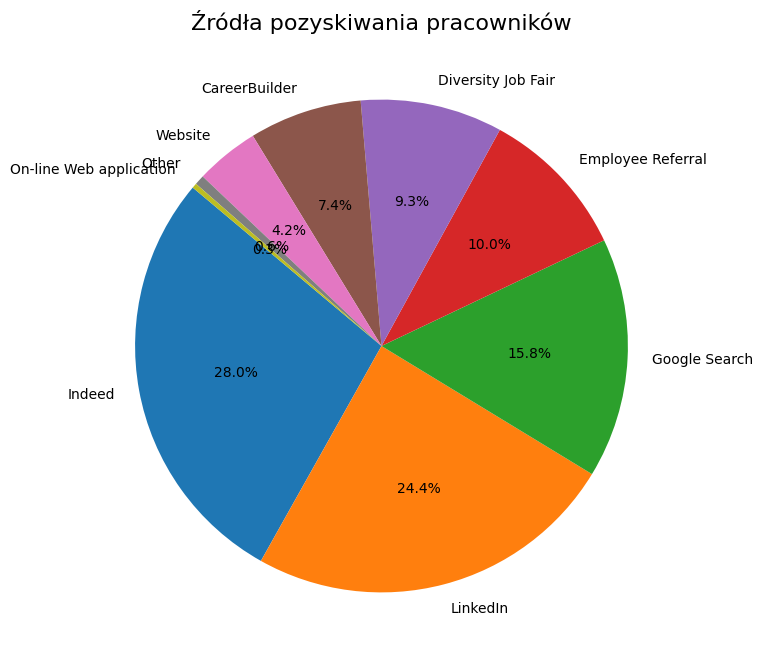

In [320]:
# Przygotowanie danych do wykresu źródeł pochodzenia pracowników
source_counts = data['RecruitmentSource'].value_counts()

# Tworzenie wykresu kołowego
plt.figure(figsize=(10, 8))
source_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Źródła pozyskiwania pracowników', fontsize=16)
plt.ylabel('')
plt.show()

Wykres przedstawia procentowy udział różnych źródeł pozyskiwania pracowników. Możemy wnioskować, że większość pracowników jest z rekrutacji wewnętrznej, następnie z Linkedina a poźniej z wyszukiwań Google.

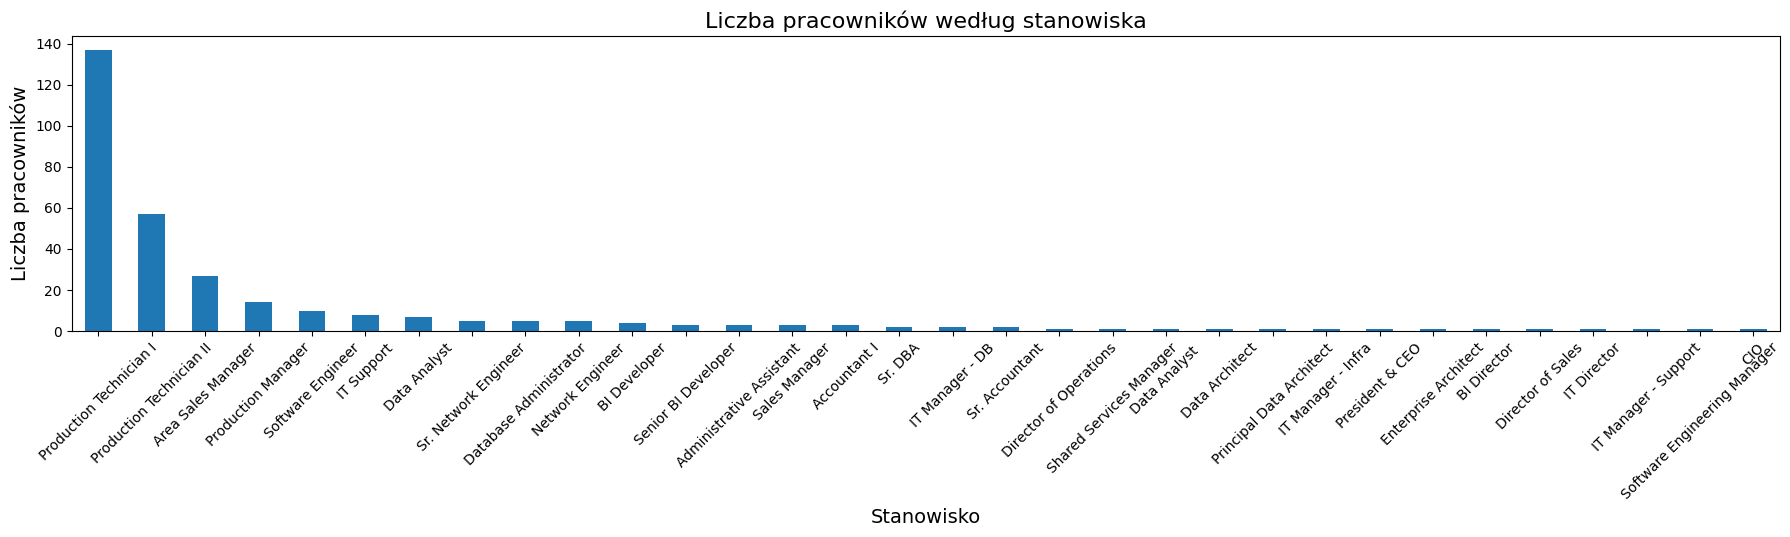

In [321]:
# Wykres 2: Wykres słupkowy liczby pracowników według stanowiska
position_counts = data['Position'].value_counts()

# Tworzenie wykresu słupkowego dla stanowisk
plt.figure(figsize=(18, 6))
position_counts.plot(kind='bar')
plt.title('Liczba pracowników według stanowiska', fontsize=16)
plt.xlabel('Stanowisko', fontsize=14)
plt.ylabel('Liczba pracowników', fontsize=14)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Wykres pokazuje liczbę pracowników na każdym stanowisku w firmie.

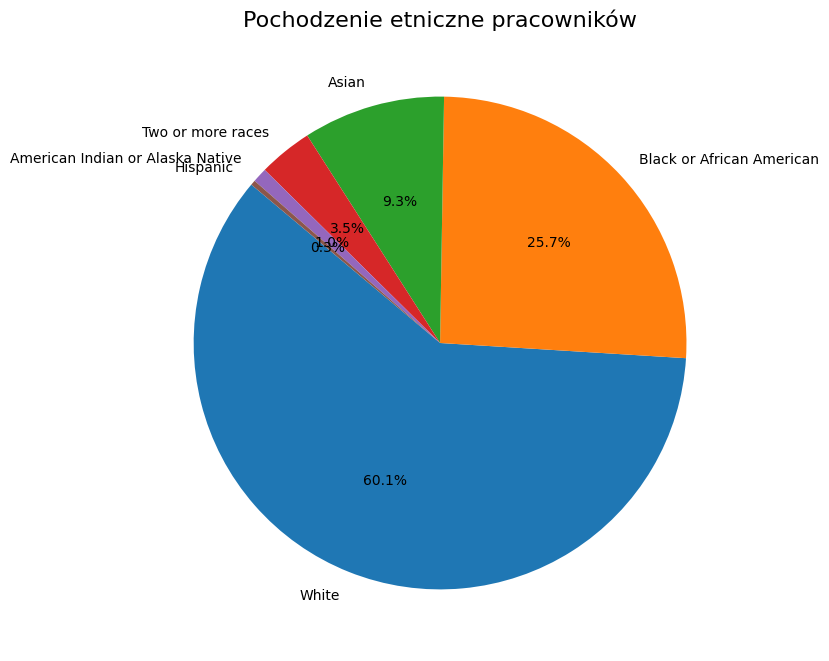

In [322]:
# Wykres 6: Wykres kołowy pochodzenia etnicznego pracowników
ethnicity_counts = data['RaceDesc'].value_counts()

# Tworzenie wykresu kołowego dla pochodzenia etnicznego
plt.figure(figsize=(10, 8))
ethnicity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Pochodzenie etniczne pracowników', fontsize=16)
plt.ylabel('')
plt.show()

Wykres prezentuje procentowy udział różnych grup etnicznych wśród pracowników firmy. Ponad połowa pracowników jest rasy białej, a jedna czwarta pochodzenia afroamerykańskiego.

## Hipoteza badawcza
Po przeprowadzeniu analizy eksploracyjnej naszego zbioru danych, wybraliśmy hipotezę badawczą.

W tym zbiorze chcielibyśmy odpowiedzieć na pytanie: Jakie cechy najbardziej wpływają na wynagrodzenie pracownika (Salary). Salary będzie to nasza zmienna objaśniana, natomiast pozostałe zmienne ilościowe takie jak płeć, rasa, numer stanowiska, numer menedżera, liczba spóźnień w ciagu 30 dni itd. będą zmiennymi objaśniającymi.

Przeprowadzajcc w kolejnym etapie projektu opracowanie modeli regresji, chcielibyśmy wybrać cechy, które są najważniejsze do przeprowadzenia estymacji wielkości wynagrodzenia pracownika.


<h1>Opracowanie modeli regresji</h1>
<P>W tej części zajmiemy sie opracowywaniem różnych modeli regresji poprzez zastosowanie poznanych na wykładzie i ćwiczeniach laboratoryjnych metodach doboru cech i regularyzacji</p>
<ul>
    <li>Model prostej regresji liniowej, która próbuje oszacować wartość pensji na podstawie tylko długości stażu pracownika.</li>
    <li>Model regresji wielorakiej, który zawiera wszystkie cechy.</li>
    <li>Model regresji metodą gradientową</li>
    <li>Model regresji krokowej w tył</li>
    <li>Model regresji korzystający z regularyzacji LASSO</li>
    <li>Model regresji korzystający z regularyzacji grzbietowej</li>
</ul>

In [323]:
# Liczba pracownikow zarabiajaca ponad 100000
high_earners = data[data['Salary'] > 100000]
high_earners_count = high_earners['Salary'].count()
print('Liczba pracowników zarabiających powyżej 100000: ', high_earners_count)
print('Procent pracowników zarabiających powyżej 100000: ', high_earners_count / len(data) * 100)

Liczba pracowników zarabiających powyżej 100000:  25
Procent pracowników zarabiających powyżej 100000:  8.038585209003216


In [324]:
# Wydzielenie danych na zmienne objasniajace i zmienna objasniana
from sklearn.model_selection import train_test_split
pensje = data['Salary']
zmienne = data.drop(['Salary'], axis=1)
num = ['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Termd', 'PositionID', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences', 'LengthofEmployment']

data_train, data_test, pensje_train, pensje_test = train_test_split(zmienne[num], pensje, test_size=0.2, random_state=42)
cechy = data_train.columns.values
cechy



array(['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Termd',
       'PositionID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences',
       'LengthofEmployment'], dtype=object)

In [325]:
# Model regresji liniowej bioracej pod uwage tylko staz pracy


[('MarriedID', 1366.473430929128), ('MaritalStatusID', -921.8266538297039), ('GenderID', 402.1860170750019), ('EmpStatusID', 281.99938747105693), ('DeptID', -3509.988189771043), ('PerfScoreID', 4461.636566668716), ('FromDiversityJobFairID', -524.3169282215065), ('Termd', -3587.7895086462017), ('PositionID', -141.63108097682576), ('EngagementSurvey', 2428.937493377529), ('EmpSatisfaction', 780.1288939088529), ('SpecialProjectsCount', 3337.981419481779), ('DaysLateLast30', 2458.372511128404), ('Absences', 490.30222299201137), ('LengthofEmployment', 170.29304234135134)]
Błąd średniokwadratowy: 505255421.67
Współczynnik determinacji: 0.38


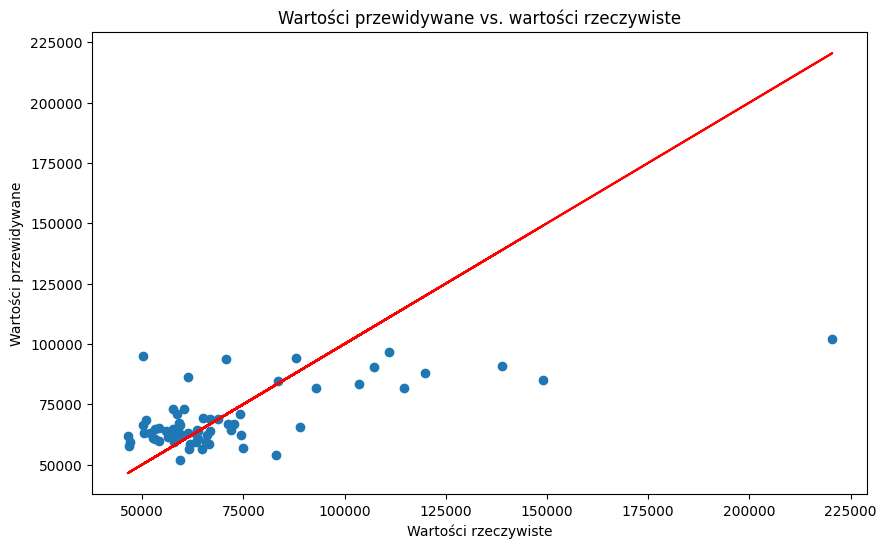

In [326]:
# Model regresji wielorakiej, ktory bierze pod uwage wszystkie zmienne
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(data_train, pensje_train)

# Wspolczynniki regresji
coeffs = []
for coeff in zip(cechy, multiple_linear_regression.coef_):
    coeffs.append(coeff)
print(coeffs)

# Wyliczenie wartosci przewidywanych
pensje_pred = multiple_linear_regression.predict(data_test)

# Wyliczenie bledu sredniokwadratowego
print('Błąd średniokwadratowy: %.2f' % mean_squared_error(pensje_test, pensje_pred))

# Wyliczenie wspolczynnika determinacji
print('Współczynnik determinacji: %.2f' % r2_score(pensje_test, pensje_pred))

# Wykres dopasowania wartosci przewidywanych do wartosci rzeczywistych
plt.figure(figsize=(10, 6))
plt.plot(pensje_test, pensje_pred, 'o')
plt.plot(pensje_test, pensje_test, 'r')
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Wartości przewidywane')
plt.title('Wartości przewidywane vs. wartości rzeczywiste')
plt.show()





<h3>Podsumowanie wynikow modelu</h3>
<p>
Analizujac wspolczynniki modelu regresji wielorakiej mozemy zauwazyc jakie zmienna maja pozytywny a jakie negatywny wplyw na wzrost pensji pracownika. 
Na przyklad cechy zwiekszajace poziom pensji pracownika to:
<ul>
    <li>PerfScoreID: 4461.64</li>
    <li>SpecialProjectsCount: 3337.98</li>
    <li>DaysLateLast30: 2458.37</li>
    <li>EngagementSurvey: 2428.94</li>
    <li>MarriedID: 1366.473430929128</li>
    <li>EmpSatisfaction: 780.1288939088529</li>
    <li>Absences: 490.30222299201137</li>
    <li>GenderID: 402.1860170750019</li>
    <li>EmpStatusID: 281.99938747105693</li>
    <li>LengthofEmployment: 170.29304234135134</li>
    
</ul>
Cechy ktore natomiast zmniejszaja wartosc pensji to:
<ul>
    <li>PositionID: -141.63108097682576</li>
    <li>FromDiversityJobFairID: -524.3169282215065</li>
    <li>MaritalStatusID: -921.8266538297039</li>
    <li>DeptID: -3509.988189771043</li>
    <li>Termd: -3587.7895086462017</li>
</ul>

Pozniej mozemy spojrzec na blad sredniokwadratowy MSE:

MSE mierzy średnią kwadratów różnic między rzeczywistymi a prognozowanymi wartościami. Im niższa wartość, tym lepiej. 

W tym przypadku, MSE wynosi 505255421.67, co oznacza, że model nie jest idealny i istnieją rozbieżności między prognozowanymi a rzeczywistymi wartościami.

Kolejna miara naszego modelu jest wspolczynnik determinacji R^2:

R^2 mierzy, jak dobrze model dostosowuje się do danych. 

Wartość 0.38 oznacza, że model wyjaśnia 38% zmienności w danych. Wysoki R^2 wskazuje, że model jest w stanie dobrze przewidzieć zmienną zależną na podstawie zmiennych niezależnych, ale 38% może sugerować, że model ma ograniczone zdolności predykcyjne lub że istnieją inne czynniki wpływające na zmienną zależną, których model nie uwzględnia.
</p>
<p>Wnioski:
# TODO 
</p>

In [327]:
# Model regresji metoda gradientu prostego



In [328]:
# Model regresji krokowej w tyl (backward stepwise regression)

[('MarriedID', 0.0), ('MaritalStatusID', -492.68746130644223), ('GenderID', 0.0), ('EmpStatusID', -246.4991999943067), ('DeptID', -2995.9640444645806), ('PerfScoreID', 2144.130809842308), ('FromDiversityJobFairID', -0.0), ('Termd', -0.0), ('PositionID', -118.28111146726148), ('EngagementSurvey', 1616.3540420570193), ('EmpSatisfaction', 465.7876080969125), ('SpecialProjectsCount', 3535.3023170211745), ('DaysLateLast30', 1048.7458241275278), ('Absences', 496.45593043365267), ('LengthofEmployment', 301.9007875806075)]
Błąd średniokwadratowy: 505236114.68
Współczynnik determinacji: 0.38


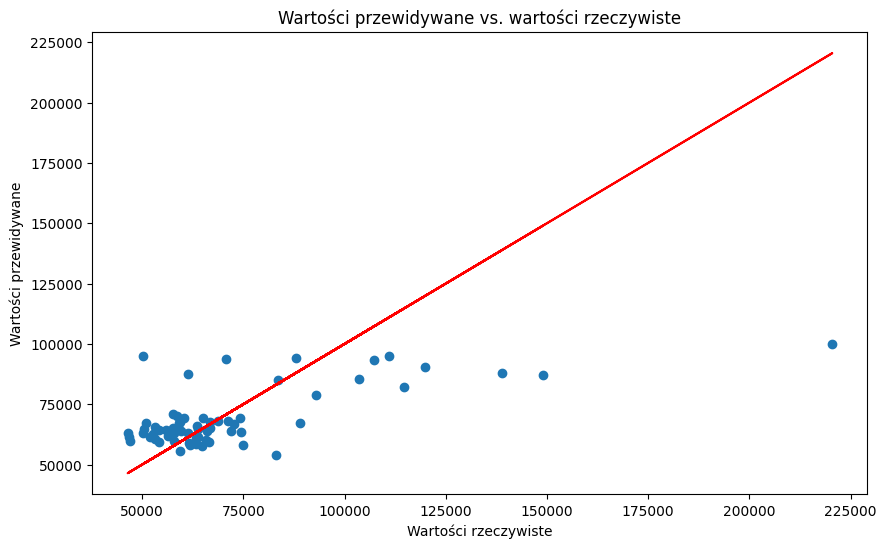

In [329]:
# Model regresji korzystajacej z regularyzacji LASSO
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(data_train, pensje_train)

# Wspolczynniki regresji
coeffs = []
for coeff in zip(cechy, lasso_regressor.best_estimator_.coef_):
    coeffs.append(coeff)
print(coeffs)

# Wyliczenie wartosci przewidywanych
pensje_pred = lasso_regressor.predict(data_test)

# Wyliczenie bledu sredniokwadratowego
print('Błąd średniokwadratowy: %.2f' % mean_squared_error(pensje_test, pensje_pred))

# Wyliczenie wspolczynnika determinacji
print('Współczynnik determinacji: %.2f' % r2_score(pensje_test, pensje_pred))

# Wykres dopasowania wartosci przewidywanych do wartosci rzeczywistych
plt.figure(figsize=(10, 6))
plt.plot(pensje_test, pensje_pred, 'o')
plt.plot(pensje_test, pensje_test, 'r')
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Wartości przewidywane')
plt.title('Wartości przewidywane vs. wartości rzeczywiste')
plt.show()


<h3>Podsumowanie wynikow modelu</h3>
<p>
Analizujac wspolczynniki modelu regresji po regularyzacji LASSO mozemy zauwazyc jakie zmienna maja pozytywny a jakie negatywny wplyw na wzrost pensji pracownika. 
Na przyklad cechy zwiekszajace poziom pensji pracownika to:
<ul>
    <li>SpecialProjectsCount: 3535.3023170211745</li>
    <li>PerfScoreID: 2144.130809842308</li>
    <li>EngagementSurvey: 1616.3540420570193</li>
    <li>DaysLateLast30: 1048.7458241275278</li>
    <li>Absences: 496.45593043365267</li>
    <li>EmpSatisfaction: 465.7876080969125</li>
    <li>LengthofEmployment: 301.9007875806075</li>
</ul>
Cechy ktore natomiast zmniejszaja wartosc pensji to:
<ul>
    <li>PositionID: -118.28111146726148</li>
    <li>EmpStatusID: -246.4991999943067</li>
    <li>MaritalStatusID: -492.68746130644223</li>
    <li>DeptID: -2995.9640444645806</li>
</ul>

Cechy z wyzerowanymi wspolczynnikami:
<ul>
    <li>MarriedID</li>
    <li>GenderID</li>
    <li>FromDiversityJobFairID</li>
    <li>Termd</li>
</ul>
Oznacza to, że te cechy prawdopodobnie nie mają wpływu na prognozowaną zmienną w tym modelu.

Pozniej mozemy spojrzec na blad sredniokwadratowy MSE:

W tym przypadku, MSE wynosi 505236114.68, co oznacza, że model nie jest idealny i istnieją rozbieżności między prognozowanymi a rzeczywistymi wartościami.

Kolejna miara naszego modelu jest wspolczynnik determinacji R^2:

R^2 mierzy, jak dobrze model dostosowuje się do danych. 

Wartość 0.38 oznacza, że model wyjaśnia 38% zmienności w danych. Wysoki R^2 wskazuje, że model jest w stanie dobrze przewidzieć zmienną zależną na podstawie zmiennych niezależnych, ale 38% może sugerować, że model ma ograniczone zdolności predykcyjne lub że istnieją inne czynniki wpływające na zmienną zależną, których model nie uwzględnia.
</p>
<p>Wnioski:
# TODO 
</p>

In [330]:
# Model regresji korzystajacej z regularazacji RIDGE